# Spherical hole problem

The spherial hole problem is considered in 24.1.2 in

[1] J.R. Barber, Elasticity, 2002, 2nd ed.

The domain defined as
$$
    \Omega = \{ x \in \mathbb{R^3} : 0 < a < |x| < A\}
$$
Let
$$
    \Gamma^r = \{ x \in \mathbb{R^3} : |x| = r\},
$$
then $\partial\Omega = \Gamma^a \cup \Gamma^A$.

Spherical coordinates are given by

$$
\begin{aligned}
    x &= R \cos(\theta) \sin(\beta), \\
    y &= R \sin(\theta) \sin(\beta), \\
    z &= R \cos(\beta),
\end{aligned}
$$
where $\theta \in [0,2\pi)$ and $\beta\in[0,\pi)$.

Sought is the solution to the problem
$$
\begin{aligned}
    \sigma_{RR} = 0, & \quad x \in \Gamma^a, \\
    \sigma_{R\theta} = 0, & \quad x \in \Gamma^a, \\
    \sigma_{R\beta} = 0, & \quad x \in \Gamma^a, \\
    u_r = g_r, & \quad x \in \Gamma^A, \\
    u_\theta = g_\theta, & \quad x \in \Gamma^A, \\
    u_\beta = g_\beta, & \quad x \in \Gamma^A,
\end{aligned}
$$
such that the equations of elasticity are satisfied.

Define necessary symbols

In [1]:
from sympy import *
from util import lua_code, lua_code_cse
init_printing()

In [2]:
R, t, b = symbols('R theta beta')
a, S, mu, nu = symbols('a S mu0 nu')

Solution ansatz [1]:

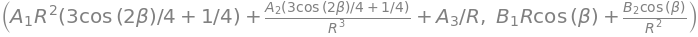

In [3]:
A1, A2, A3, B1, B2 = symbols('A_1 A_2 A_3 B_1 B_2')
P2 = (3*cos(2*b) + 1) / 4
P1 = cos(b)
P0 = 1
phi = A1*R**2*P2 + A2*R**(-3)*P2 + A3*R**(-1)*P0
w = B1*R*P1 + B2*R**(-2)*P1
(phi, w)

Compute stresses (Table 19.2, Solutions A and B [1]):

In [4]:
sRR = phi.diff(R,2) + R*cos(b)*w.diff(R, 2) - 2*(1-nu)*w.diff(R)*cos(b) + 2*nu/R * w.diff(b) * sin(b)
sRb = phi.diff(R).diff(b) / R - phi.diff(b) / R**2 + (1-2*nu)*w.diff(R)*sin(b) + cos(b)*w.diff(b).diff(R) - 2*(1-nu)*cos(b)/R * w.diff(b)

The solution is given by coefficients

In [5]:
sol = [(A1, S*nu / (1+nu)),
        (A2, S*a**5 / (7-5*nu)),
        (A3, S*a**3 * (6-5*nu) / (2*(7-5*nu))),
        (B1, -S / (2*(1+nu))),
        (B2, -5*S*a**3 / (2*(7-5*nu)))]

Check boundary condition on inner sphere.

In [6]:
(simplify(sRR.subs(sol).subs(R, a)),
 simplify(sRb.subs(sol).subs(R, a)))

Compute displacements (Table 19.2, Solutions A and B [1]):

In [7]:
uR = (phi.diff(R) + R*cos(b)*w.diff(R) - (3-4*nu)*w*cos(b))/(2*mu)
ub = (phi.diff(b) / R + cos(b)*w.diff(b) + (3-4*nu)*w*sin(b))/(2*mu)

We set $g_r=u_r, g_\theta = 0, g_\beta = u_\beta$ on the outer sphere boundary.

Generate Lua code:

In [8]:
lua_code_cse([('uR', simplify(uR.subs(sol))), ('ub', simplify(ub.subs(sol)))])

local x0 = 5*nu
local x1 = x0 - 7
local x2 = x1^3
local x3 = 2*beta
local x4 = 3*math.cos(x3) + 1
local x5 = R^5
local x6 = 2*nu*x5
local x7 = nu + 1
local x8 = x1^2
local x9 = 3*a^5
local x10 = a^3
local x11 = x10*x7
local x12 = R^2
local x13 = 2*x12*x8
local x14 = R^3*x1
local x15 = S/(R^4*mu0*x7)
local x16 = x10*x12
local x17 = nu^2
local uR = (1.0/8.0)*x15*(-x11*x13*(x0 - 6) - x13*(10*x11 + x14 - (4*nu - 3)*(5*x11 - x14))*math.cos(beta)^2 + x2*x4*x6 + x4*x7*x8*x9)/x2
local ub = (1.0/4.0)*x15*(nu*x9 - x0*x16 - 10*x16*x17 + 5*x16 - 5*x17*x5 + 7*x5 + x6 + x9)*math.sin(x3)/x1


Compute Jacobian

In [9]:
J = {}
J['uR_R'] = simplify(uR.diff(R).subs(sol))
J['uR_b'] = simplify(uR.diff(b).subs(sol))
J['ub_R'] = simplify(ub.diff(R).subs(sol))
J['ub_b'] = simplify(ub.diff(b).subs(sol))
lua_code_cse(J.items())

local x0 = a^5
local x1 = nu + 1
local x2 = 2*beta
local x3 = math.cos(x2)
local x4 = 3*x3 + 1
local x5 = 5*nu
local x6 = x5 - 7
local x7 = R^5
local x8 = nu*x7
local x9 = math.cos(beta)^2
local x10 = a^3
local x11 = R^2
local x12 = x10*x11
local x13 = 2*nu
local x14 = 10*x10
local x15 = S/(mu0*x6)
local x16 = (1.0/4.0)*x15
local x17 = x16/(x1*x7)
local x18 = R^(-4)
local x19 = 20*x12
local x20 = math.sin(x2)
local x21 = 7*x7
local x22 = 12*x0
local x23 = x11*x14
local x24 = nu^2
local x25 = nu*x23
local uR_R = x17*(-6*x0*x1*x4 + 2*x1*x12*(x5 + 15*x9 - 6) + 2*x11*x9*(1 - x13)*(R^3*x6 + x1*x14) + x4*x6*x8)
local uR_b = x16*x18*x20*(-nu*x19 - 9*x0 + 25*x12 + 14*x7 - 10*x8)
local ub_R = x17*x20*(-nu*x22 + x13*x7 + x19*x24 + x21 - x22 - x23 - 5*x24*x7 + x25)
local ub_b = (1.0/2.0)*x15*x18*x3*(3*x0 + 5*x12 + x21 - x25 - x5*x7)
